In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, read_csv
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline



import os
print(os.listdir("../input"))


['avocado.csv']


**DATA VISUALIZATION-BAR GRAPH**
* Average price of avocado according to region *#BAR GRAPH*
* Average price of avocado according to types(conventional/organic) *#BAR GRAPH*
* Average of total volume according to region *#BAR GRAPH*
* Average of total volume according tob types(conventional/organic) *#BAR GRAPH*
* Average of total volume vs average price *#JOINT PLOT*
* Small bags, large bags an x large bags of each region *#POINT PLOT*
* Correlation map according to correlations among small bags,large bags and x large bags *#HEAT MAP*
* Bag count according to sizes of avocado *#VİOLİN PLOT*
* Average price vs total volume *#LM PLOT*


In [2]:
data=pd.read_csv('../input/avocado.csv')

In [3]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
data.type.unique()
data.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

**AVERAGE PRICE OF AVOCADO ACCORDING TO REGION**

Text(0.5,1,'Average Price of Avocado According to Region')

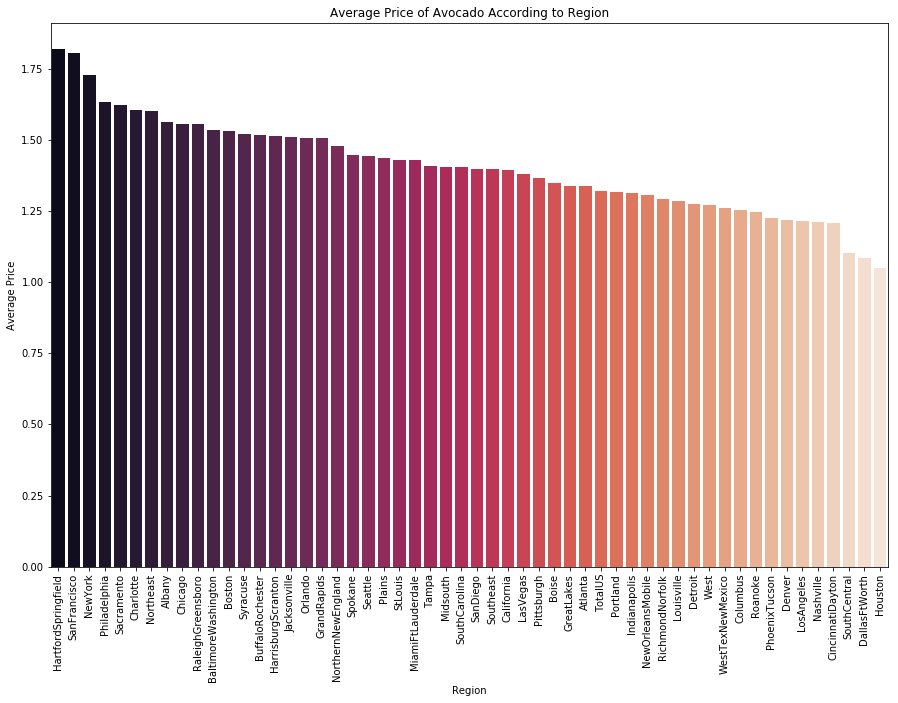

In [6]:
region_list=list(data.region.unique())
average_price=[]

for i in region_list:
    x=data[data.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(15,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price,palette='rocket')

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

> **AVERAGE PRICE OF AVOCADO ACCORDING TO TYPES(CONVENTIONAL/ORGANIC)**

Text(0.5,1,'Average Price of Avocado According to Types')

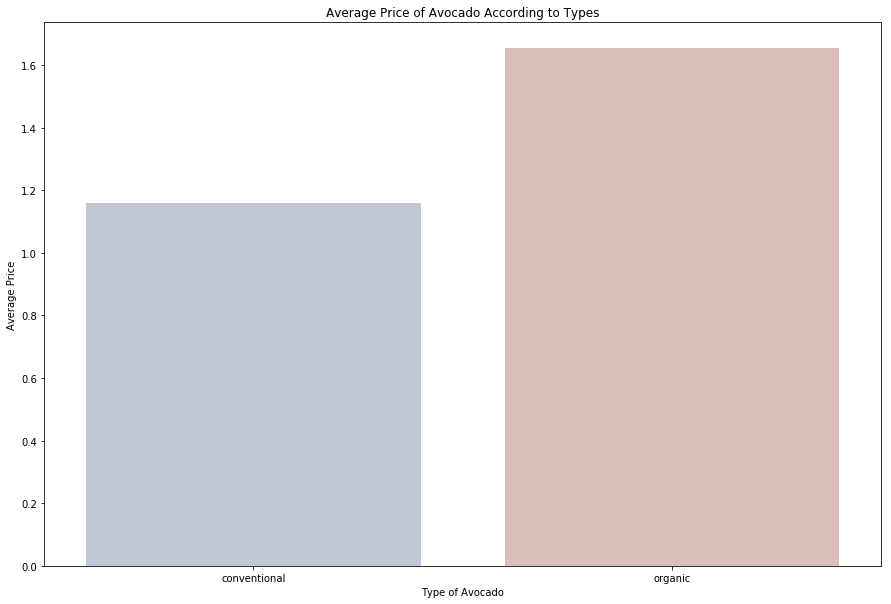

In [7]:
type_list=list(data.type.unique())
average_price2=[]

for i in type_list:
    x=data[data.type==i]
    average_price2.append(sum(x.AveragePrice)/len(x))
df2=pd.DataFrame({'type_list':type_list,'average_price':average_price2})

plt.figure(figsize=(15,10))
ax=sns.barplot(x=df2.type_list,y=df2.average_price,palette='vlag')
plt.xlabel('Type of Avocado')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Types')



**AVERAGE OF TOTAL VOLUME ACCORDİNG TO REGİON**

Text(0.5,1,'Average of Total Volume According to Region')

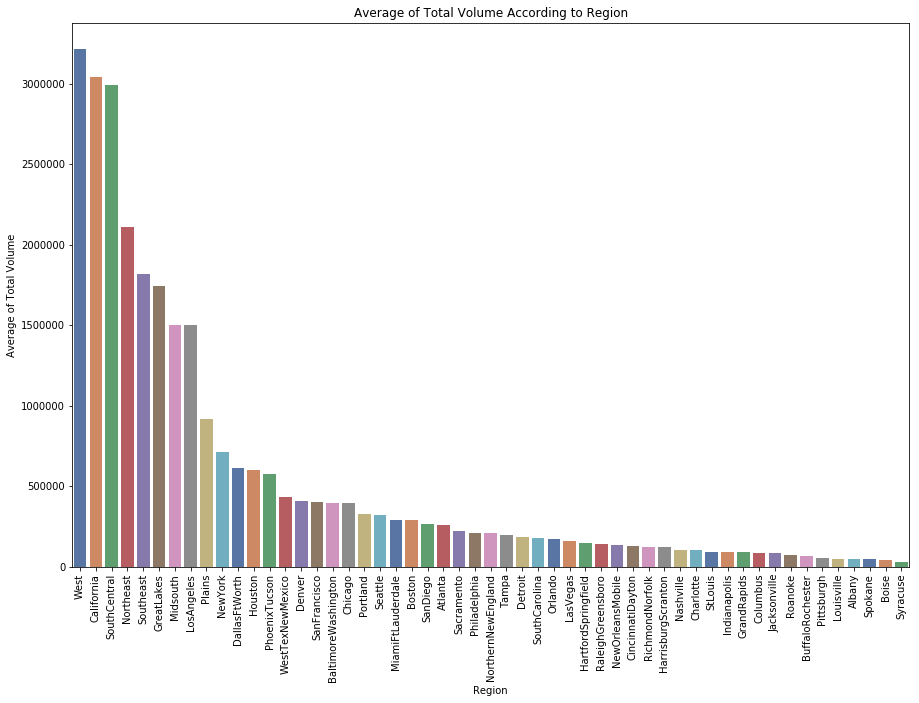

In [8]:
filter1=data.region!='TotalUS'
data1=data[filter1]

region_list=list(data1.region.unique())
average_total_volume=[]

for i in region_list:
    x=data1[data1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(15,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume,palette='deep')

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

**AVERAGE OF TOTAL VOLUME ACCORDİNG TO TYPE(CONVENTIONAL/ORGANIC)**

Text(0.5,1,'Average of Total Volume According to Types')

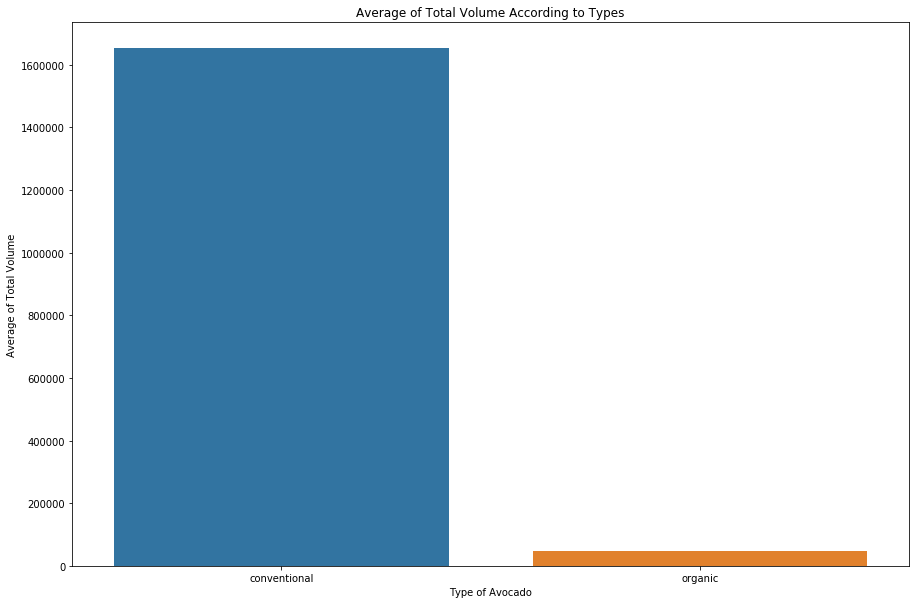

In [9]:
type_list1=list(data.region.unique())
average_total_volume1=[]

for i in type_list:
    x=data[data.type==i]
    average_total_volume1.append(sum(x['Total Volume']/len(x)))
df4=pd.DataFrame({'type_list':type_list,'average_total_volume1':average_total_volume1})

plt.figure(figsize=(15,10))
ax=sns.barplot(x=df4.type_list,y=df4.average_total_volume1)
plt.xlabel('Type of Avocado')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Types')

**AVERAGE TOTAL VOLUME VS AVERAGE PRİCE**

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


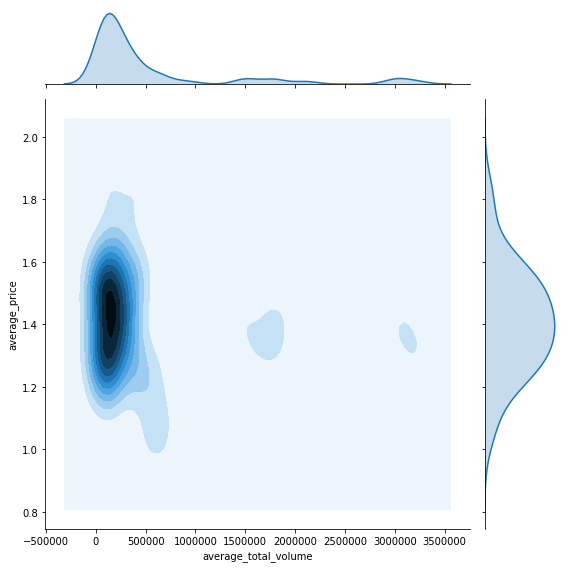

In [10]:
datab=pd.concat([df3,df1.average_price],axis=1)
j1=sns.jointplot('average_total_volume','average_price',data=datab,kind='kde',size=8)
plt.show
plt.savefig('graph.png')


**SMALL BAGS , LARGE BAGS AND X LARGE BAGS OF EACH REGİON**

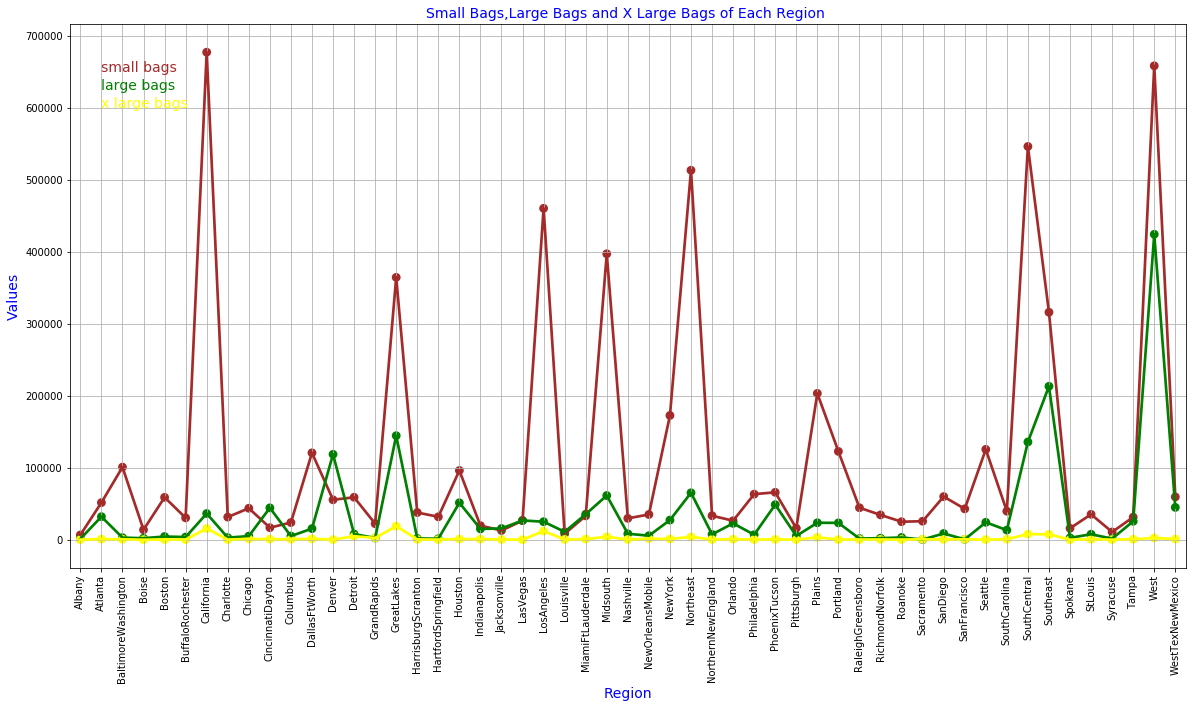

In [11]:


small=[]
large=[]
xlarge=[]

for i in region_list:
    x=data[data.region==i]
    small.append(sum(x['Small Bags'])/len(x))
    large.append(sum(x['Large Bags'])/len(x))
    xlarge.append(sum(x['XLarge Bags'])/len(x))
df5=pd.DataFrame({'region_list':region_list,'small':small,'large':large,'xlarge':xlarge})

f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x=region_list,y=small,data=df5,color='brown',alpha=0.7)
sns.pointplot(x=region_list,y=large,data=df5,color='green',alpha=0.7)
sns.pointplot(x=region_list,y=xlarge,data=df5,color='yellow',alpha=0.7)

plt.xticks(rotation=90)
plt.text(1,650000,'small bags',color='brown',fontsize=14)
plt.text(1,625000,'large bags',color='green',fontsize=14)
plt.text(1,600000,'x large bags', color='yellow',fontsize=14)

plt.xlabel('Region',color='blue',fontsize=14)
plt.ylabel('Values',color='blue',fontsize=14)
plt.title('Small Bags,Large Bags and X Large Bags of Each Region ',color='blue',fontsize=14)
plt.grid()

**CORRELATION MAP ACCORDING TO CORELATIONS AMONG SMALL BAGS, LARGE BAGS AND X LARGE BAGS**

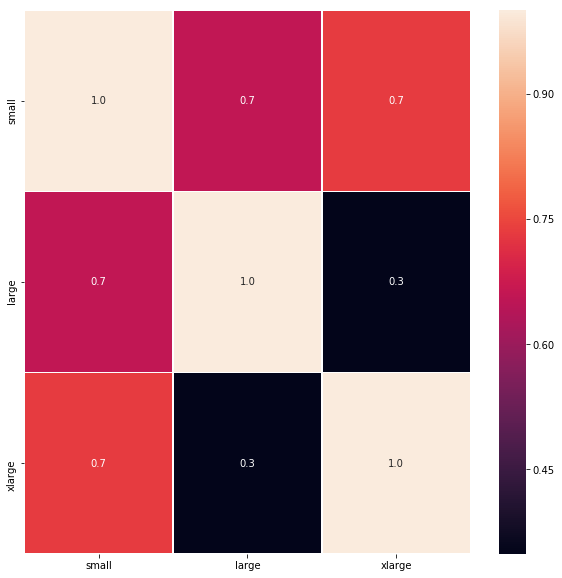

In [12]:
f,ax2=plt.subplots(figsize=(10,10))
sns.heatmap(df5.corr(),annot=True, linewidth=.5, fmt='.1f',ax=ax2)
plt.show()

**BAG COUNT ACCORDING TO SIZES OF AVOCADO**

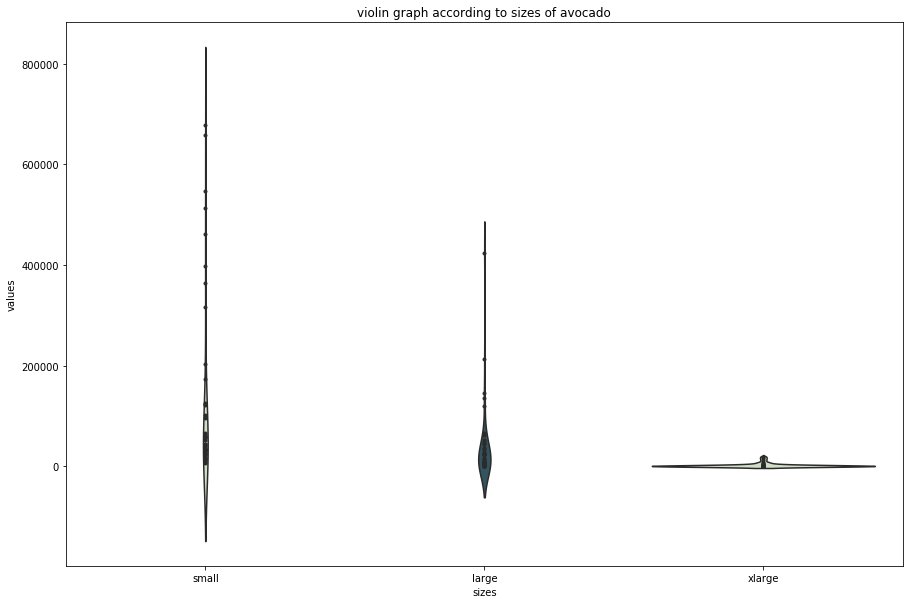

In [13]:
pal=sns.cubehelix_palette(2,rot=-.5,dark=.3)
plt.figure(figsize=(15,10))
sns.violinplot(data=df5, palette=pal, inner='points')
plt.xlabel('sizes')
plt.ylabel('values')
plt.title('violin graph according to sizes of avocado')

plt.show()

**AVERAGE PRİCE VS TOTAL VOLUME**

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 720x720 with 0 Axes>

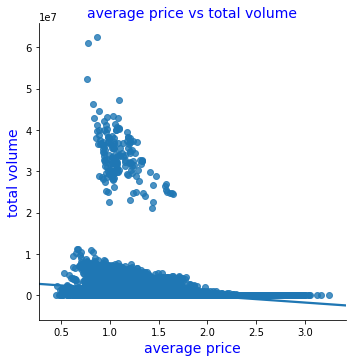

In [14]:
plt.figure(figsize=(10,10))
sns.lmplot('AveragePrice','Total Volume',data=data)
plt.xlabel('average price',color='blue',fontsize=14)
plt.ylabel('total volume',color='blue',fontsize=14)
plt.title('average price vs total volume',color='blue',fontsize=14)
plt.show()

**here, is all analysis made by using avocado data set and all the analysis shows up how millienials are buying avocados acoording by their prices and bag count **